
# Homework 2: Introduction to Probability and Simulation 
***

**Name**: Solution

***

This assignment is due on Canvas by **11:59 PM on Friday February 14**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***


### [20 points] Problem 1

To play a game, you have a box containing 20 fair [four-sided dice](https://en.wikipedia.org/wiki/Four-sided_die), with faces `{1,2,3,4}`.  This bag also contains 15 fair six-sided dice (faces `{1,2,3,4,5,6}`) and 5 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Four", "Six" and "Twenty" (or F, S, and T, for short).  You grab one die at random from the box.  

Work the following problems by hand (and LaTeX your solutions) unless otherwise stated (but don't be afraid to simulate to check your result!).

**Part A**: You roll your die one time.  What is the probability of the event $R_6$, that you roll a 6?  Include at least 4 decimal places in your final answer.

**Solution**:
Using the Law of Total Probability, we have:

$\begin{align*}
P(R_6) &= P(R_6 \mid F)P(F) + P(R_6 \mid S) P(S) + P(R_6 \mid T) P(T) \\
&= 0 + \frac{1}{6} \frac{15}{40} + \frac{1}{20}\frac{5}{40} \\
&= \frac{15}{240} + \frac{5}{800} \\
&= \frac{11}{160} = 0.06875
\end{align*}$

**Part B**: Suppose you roll a 6.  What is the probability that the die you chose from the box is a Six-sided die? 

**Solution**:

We use Bayes' Theorem:

$\begin{align*}
P(S \mid R_6) &= \frac{P(R_6 \mid S) P(S)}{P(R_6)} \\
 &= \frac{\frac{1}{6} \cdot \frac{15}{40}}{\frac{11}{160}} \\
 &= \frac{\frac{1}{16}}{\frac{11}{16\cdot 10}} \\
 &= \frac{10}{11} \approx 0.909
\end{align*}$

**Part C:**  Are the events $R_6$ and $S$ independent?  Justify your answer **using math**.

**Solution:**

No they are not independent.  We know this because $P(R_6) \neq P(R_6 \mid S)$:
* $P(R_6) = 0.06875$ (from **Part A**)
* $P(R_6 \mid S) = \frac{1}{6} \approx 0.167$ (from part of **Part B**)

**NB:** We could also have checked either:
* $P(R_6 \cap S) \stackrel{?}{=} P(R_6)P(S)$, or
* $P(S \mid R_6) \stackrel{?}{=} P(S)$

**Part D:** Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 5 or 6 you know you did *not* pick a Four-sided die, and if you roll a 7 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3 or 4, you would have a stronger belief that you in fact grabbed one of the Four-sided dice.  Let $E_n$ be the event that you roll $n$ rolls of 1, 2, 3 or 4 in a row.  For example, one outcome in $E_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3 or 4, what is the probability that you have grabbed a Four-sided die?  That is, calculate **by hand** $P(F \mid E_1)$. 

**Solution:**

$\begin{align*}
P(F \mid E_1) &= \frac{P(E_1 \mid F) P(F)}{P(E_1)} \\
 &= \frac{P(E_1 \mid F) P(F)}{P(E_1 \mid F) P(F) + P(E_1 \mid S) P(S)  + P(E_1 \mid T) P(T)} \\
 &= \frac{1 \cdot \frac{20}{40}}{1\cdot \frac{20}{40} + \frac{4}{6} \frac{15}{40}  + \frac{4}{20} \frac{5}{40}} \\
 &= \frac{\frac{1}{2}}{\frac{1}{2} + \frac{1}{4} + \frac{1}{40}} \\
 &\approx 0.6452
\end{align*}$

**Part E**:  First, work out **by hand** a formula for the probability in general that you are rolling a Four-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3 or 4 (that is, $E_n$).  So you want a formula for $P(F \mid E_n)$ in terms of $n$.

Then, define and code a function `prob_four` to calculate $P(F \mid E_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D** when $n=1$.

**Solution**:

Let $E_n$ be the event that we roll $n$ values in a row that are 1,2, 3 or 4.

$$P(F \mid E_n) = \frac{P(E_n \mid F) P(F)}{P(E_n)}$$

Use the Law of Total Probability on the denominator to get

$$P(F \mid E_n) = \frac{P(E_n \mid F) P(F)}{P(E_n \mid F) P(F) + P(E_n \mid S) P(S)  + P(E_n \mid T) P(T)}$$

Substitute in the easy things we already know:

$$P(F \mid E_n) = \frac{P(E_n \mid F) \frac{20}{40}}{P(E_n \mid F) \frac{20}{40} + P(E_n \mid S) \frac{15}{40} + P(E_n \mid T) \frac{5}{40}}$$

Side calculation: what's the probability that I get $\leq 4$ $n$ times in a row if I have a Four-sided die in hand?
$$P(E_n \mid F) = 1$$

Side calculation: what's the probability that I get $\leq 4$ $n$ times in a row if I have a Six-sided die in hand?
$$P(E_n \mid S) = \left(\frac{4}{6}\right)^n = \left(\frac{2}{3}\right)^n$$

Side calculation: what's the probability that I get $\leq 4$ $n$ times in a row if I have a Twenty-sided die in hand?
$$P(E_n \mid T) = \left(\frac{4}{20}\right)^n = \left(\frac{1}{5}\right)^n$$

Plug in side calcs:
$$P(F \mid E_n) = \frac{1 \cdot \frac{1}{2}}{1 \cdot \frac{1}{2} + \left(\frac{2}{3}\right)^n \cdot \frac{3}{8} + \left(\frac{1}{5}\right)^n \frac{1}{8}}$$

In [2]:
def prob_four(n):
    return 0.5/(0.5 + 0.375*((2/3)**n) + 0.125*(.2**n))

# Verification of Part D answer:  plug in n=1
print(prob_four(1))

0.6451612903225806


**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3 or 4 that would make you believe that there's a better-than-90% chance that the die you grabbed is Four-sided?  Plugging larger and larger values for $n$ into your `prob_four` function is a very reasonable way to check this.

In [3]:
[prob_four(n) for n in range(1,6)]

[0.6451612903225806,
 0.7444168734491315,
 0.8168451624614268,
 0.8706644136881345,
 0.910046100014291]

**Solution:** $n=5$ is large enough for us to say there's at least a 90% chance we are rolling a 4-sided die.

***


### [20 points] Problem 2

Stella is very excited to have secured a professorship in the Computer Science department here at CU. She works hard, but has a problem finding her way around Boulder after leaving work. When she leaves work from the CU Engineering Center (E-Center), she must randomly choose a location on the map below and go there.   

Here are some rules governing her movements throughout the fair city of Boulder:
* When Stella is leaving one location, she randomly selects one of the available paths (denoted by arrows on the map), with equal probability, and goes to her next location.
* This includes back-tracking (when the arrows point in both directions). E.g. Stella could go from the Engineering Center to the Library, then directly back to the Engineering Center. 
* Note that the path from the Library to her Home is a one way path. Once she goes home, she does not return to the library, or any other location on the map. She stays at home. 
* Assume that all moves require the same amount of time.
* She cannot stay in one location, except for when she goes home. If she is not at her house, she must always move to another adjacent location.
* A "stop" is moving from one location to another. E.g. If Stella moves from the E-Center to the Library and then moves from the Library to the Gym, this is two "stops". 

<div>
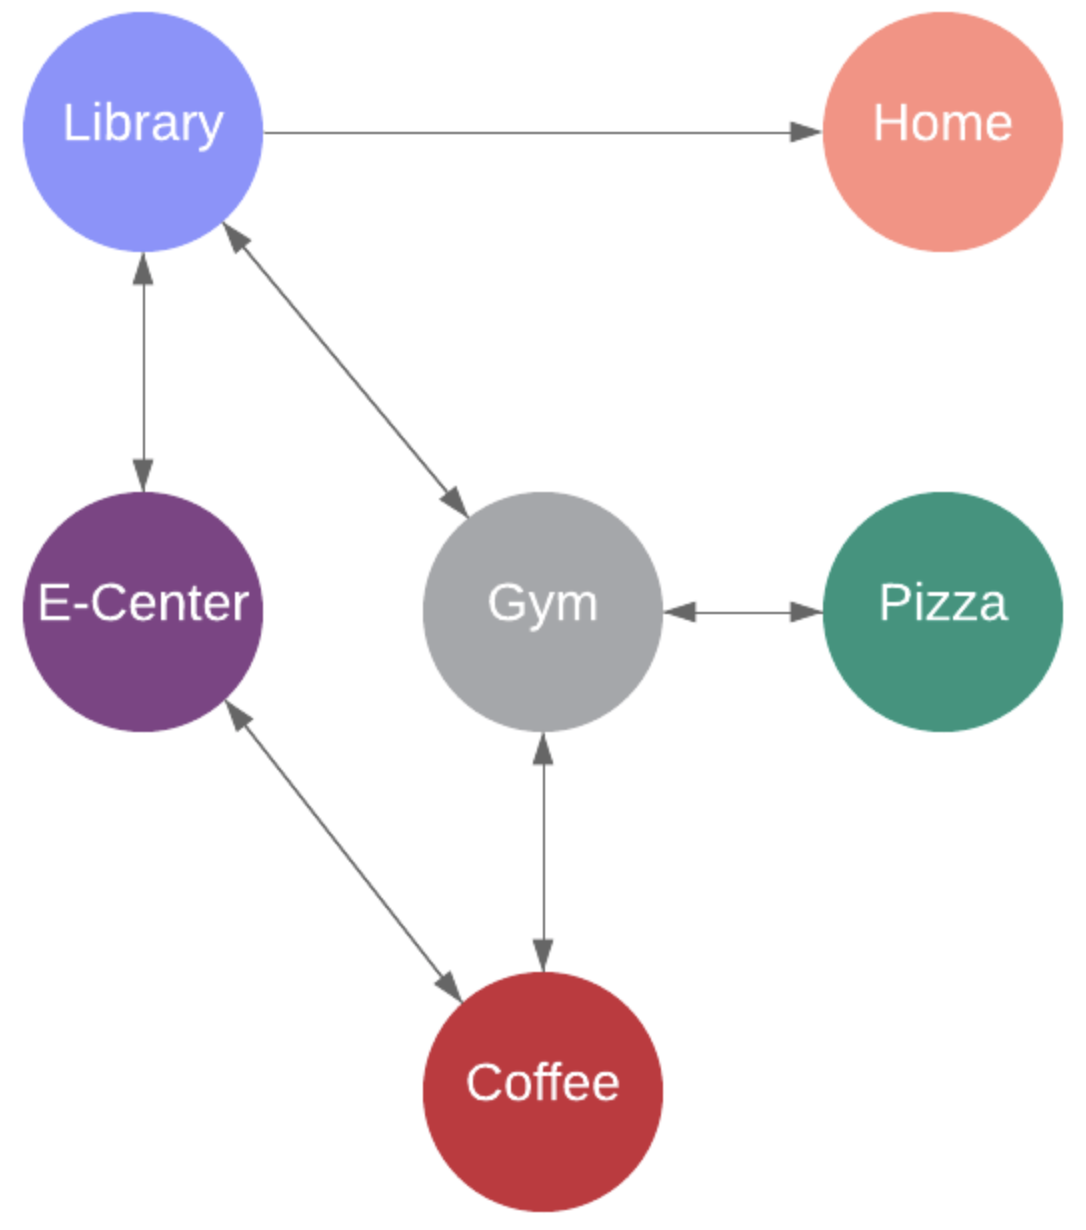
</div>

**Part A**: Stella is exhausted from a long day of researching whether [P=NP](https://en.wikipedia.org/wiki/P_versus_NP_problem) so, naturally, she wants to go to the Coffee Shop (Coffee) to grab a coffee.  

Compute the probability that Stella goes to the Coffee shop at least once in either in her first, second, or third stop after leaving from the E Center. **Calculate this by hand, showing your work in a markdown cell. You may leave answers as fractions or decimals. You may use python code as a calculator, but may not simulate this probability, or use functions that do all of the work for you.** 

**SOLUTION:**

Let the probability of going to the coffee shop first be $P(C_1)$. This will be the notation for all other stops

First, find the probability of going to the Coffee Shop in the first stop. There are only two ways to leave the E-Center, and one is to go to the Coffee shop, so $P(C_1) = \frac{1}{2}$

Now we need to find the ways to get to the Coffee Shop in the second stop. There are none, so $P(C_2) = 0$.

Next, we find the probability of going to the Coffee Shop in her third stop, given that she hasn't already gone there. If Stella has already gone to the coffee shop, we have already counted that path. 

Use the Law of Total Probability to solve. 

Note: For simplicity's sake, I've restricted the domain of possible moves below to the valid moves at each step. It would also be valid to list out all of the 0 probabilities for impossible moves. 

$
P(C_3 \mid \neg C_1) = P(C_3 \mid \neg C_1 \mid G_2)P(G_2 \mid \neg C_1) + P(C_3 \mid \neg C_1 \mid E_2)P(E_2 \mid \neg C_1)\\
$

To find $P(G_2 \mid \neg C_1)$:

$
P(G_2 \mid \neg C_1) = P(G_2 \mid \neg C_1 \mid L_1)P(L_1 \mid \neg C_1) + P(G_2 \mid C_1 \mid \neg C_1)P(C_1 \mid \neg C_1) + P(G_2 \mid \neg C_1 \mid P_1)P(P_1) \\
P(G_2 \mid \neg C_1) = P(G_2 \mid \neg C_1 \mid L_1)P(L_1 \mid \neg C_1) + 0 * 0 + 1 * 0 \\
P(G_2 \mid \neg C_1) = P(G_2 \mid \neg C_1 \mid L_1) * \frac{1}{2} \\
P(G_2 \mid \neg C_1) = \frac{1}{3} * \frac{1}{2} = \frac{1}{6}\\
$


To find $P(E_2 \mid \neg C_1)$:

$
P(E_2 \mid \neg C_1)P(E_2) = P(E_2\mid \neg c_1 \mid L_1)P(L_1) + P(E_2 \mid \neg C_1 \mid C_1)P(C_1) \\
P(E_2 \mid \neg C_1)P(E_2) = P(E_2\mid \neg c_1 \mid L_1)P(L_1) + 0 *P(C_1) \\
P(E_2 \mid \neg C_1)P(E_2) = \frac{1}{3} * \frac{1}{2} = \frac{1}{6}
$

Then we have from above: 

$
P(C_3 \mid \neg C_1) = P(C_3 \mid \neg C_1 \mid G_2)P(G_2 \mid \neg C_1) + P(C_3 \mid \neg C_1 \mid E_2)P(E_2 \mid \neg C_1)\\
P(C_3 \mid \neg C_1) = P(C_3 \mid \neg C_1 \mid G_2) * \frac{1}{6} + P(C_3 \mid \neg C_1 \mid E_2) * \frac{1}{6} \\
P(C_3 \mid \neg C_1) = \frac{1}{3} * \frac{1}{6} + \frac{1}{2} * \frac{1}{6} = \frac{1}{12} + \frac{1}{18} = \frac{5}{36}
$



Now we need to add this to the probability that Stella goes to the Coffee Shop in the first stop. Which gives us the probability of stella visiting the coffee shop at least once: $ \frac{1}{2} + \frac{5}{36} = \frac{23}{36} = 0.6389$

**Alternate Solution**: 
\begin{align*} 
P(C_1 \cup C_2 \cup C_3) &= P(C_1)+P(C_2)+P(C_3) - P(C_1 \cap C_2) - P(C_1 \cap C_3) - P(C_2 \cap C_3) + P(C_1 \cap C_2 \cap C_3) \\
                         &= P(C_1)+P(C_3)-P(C_1 \cap C_3) \\
\end{align*}

\begin{align*}
P(C_1) &= \frac{1}{2} \\
\end{align*}

\begin{align*}
P(C_3) &= P(C_3 \mid G_2)P(G_2) + P(C_3 \mid E_2)P(E_2) \\
       &= P(C_3 \mid G_2)(P(G_2 \mid L_1)P(L_1)+P(G_2 \mid P_1)P(P_1)+P(G_2 \mid C_1)P(C_1)) + P(C_3 \mid E_2)(P(E_2 \mid L_1)P(L_1) + P(E_2 \mid C_1)P(C_1)) \\
       &= \frac{1}{3} \left(\frac{1}{3} \cdot \frac{1}{2} + 0 + \frac{1}{2} \cdot \frac{1}{2} \right)+\frac{1}{2}\left(\frac{1}{3}\cdot \frac{1}{2} + \frac{1}{2} \cdot \frac{1}{2}\right) \\
       &= \frac{1}{3} \cdot \frac{5}{12} + \frac{1}{2} \cdot \frac{5}{12} \\
       &= \frac{5}{36} + \frac{5}{24} \\
\end{align*}

\begin{align*}
P(C_1 \cap C_3) &= \frac{1}{2} \cdot \frac{1}{2} \cdot \frac{1}{2} + \frac{1}{2} \cdot \frac{1}{2} \cdot \frac{1}{3}\\
                &= \frac{1}{8}+\frac{1}{12} \\
                &= \frac{5}{24} \\
\end{align*}

Thus we have: $P(C_1 \cup C_2 \cup C_3) = \frac{1}{2} + \frac{5}{36} + \frac{5}{24} - \frac{5}{24} \approx 0.639 $.

**Part B**: What is the probability that Stella gets to her house in exactly 2 stops after leaving the E-Center? **Calculate this by hand, showing you work in a markdown cell(s). You may leave answers as fractions or decimels. You may use python code as a calculator, but may not simulate this probability, or use functions that do all of the work for you.** 

**Solution:** Stella must move to the Library, then Home. There are no other possible paths. $\frac{1}{2} * \frac{1}{3} = \frac{1}{6} = 0.166$

**Part C:** What is the probability that Stella gets to her house in exactly 3 stops after leaving the E-Center? **Calculate this by hand, showing you work in a markdown cell(s). You may leave answers as fractions or decimels. You may use python code as a calculator, but may not simulate this probability, or use functions that do all of the work for you.** 

**Solution:**

Zero. It's impossible for her to get to her home in three stops.

**Part D:** What is the probability that Stella gets to her house in exactly 4 stops after leaving the E-Center? What is the probability that she gets to her house in 4 or less stops? **Calculate this by hand, showing you work in a markdown cell(s). You may leave answers as fractions or decimels. You may use python code as a calculator, but may not simulate this probability, or use functions that do all of the work for you.** 

**SOLUTION:** 
* Exactly 4 Stops:

    Using the Law of Total Probability a few times will give us:
    
    $
    P(H_4) = P(H_4 \mid L_3)P(L_3)\\
    P(H_4) = P(H_4 \mid L_3) * (P(L_3 \mid E_2)P(E_2) + P(L_3 \mid G_2)P(G_2))\\
    P(H_4) = P(H_4 \mid L_3) * (P(L_3 \mid E_2)P(E_2) + P(L_3 \mid G_2)P(G_2))\\
    $
    
    We'll solve $P(E_2)$ and $P(G_2)$ seperatly below to avoid too much confusion.
    
    $
    P(E_2) = P(E_2 \mid L_1)P(L_1) + P(E_2 \mid C_1)P(C_1)\\
    P(E_2) = P(E_2 \mid L_1) * \frac{1}{2} + P(E_2 \mid C_1) * \frac{1}{2}\\
    P(E_2) = \frac{1}{3} * \frac{1}{2} + \frac{1}{2} * \frac{1}{2} = \frac{1}{6} + \frac{1}{4} = \frac{5}{12}\\
    $
    
    $
    P(G_2) = P(G_2 \mid L_1)P(L_1) + P(G_2 \mid C_1)P(C_1) + P(G_2 \mid P_1)P(P_1)\\
    P(G_2) = P(G_2 \mid L_1) * \frac{1}{2} + P(G_2 \mid C_1)\frac{1}{2} + P(G_2 \mid P_1) * 0\\
    P(G_2) = \frac{1}{3} * \frac{1}{2} + \frac{1}{2}\frac{1}{2} = \frac{1}{6} + \frac{1}{4} = \frac{5}{12}
    $
    
    Then we can substitute in the original:
    
    $
    P(H_4) = P(H_4 \mid L_3) * (P(L_3 \mid E_2)P(E_2) + P(L_3 \mid G_2)P(G_2))\\
    P(H_4) = P(H_4 \mid L_3) * (P(L_3 \mid E_2)* \frac{5}{12} + P(L_3 \mid G_2) * \frac{5}{12})\\
    P(H_4) = P(H_4 \mid L_3) * (\frac{1}{2}* \frac{5}{12} + \frac{1}{3} * \frac{5}{12})\\
    P(H_4) = P(H_4 \mid L_3) * (\frac{5}{24} + \frac{5}{36})\\
    P(H_4) = P(H_4 \mid L_3) * (\frac{15}{72} + \frac{10}{72})\\
    P(H_4) = P(H_4 \mid L_3) * (\frac{25}{72})\\
    P(H_4) = \frac{1}{3} * \frac{25}{72} = \frac{25}{216} = 0.115 \\
    $
    
* In 4 or less stops:

    $P(H_4) + P(H_2) = \frac{25}{216} + \frac{1}{6} = \frac{25}{216} + \frac{36}{216} = \frac{61}{216} = 0.282$

 

**Part E:** Write a Python simulation to confirm that your by-hand calculations in **Part B**, **Part C**, and **Part D** are correct. Don't worry about simulating **Part A**. Your simulation code should simulate Stella's movement after leaving the E-Center and end when she reaches home. You should run the simulation at least 2000 times and record how many stops it took Stella to get home on each run (in an array... don't print 2000 results). Then use that array to print the simulated probability of reaching home in 2 stops, 3 stops, 4 stops, and 4 or less stops. ***Then summarize your results in a markdown cell***.

***Make sure to either comment your code, write exteremely readable code, or use a markdown cell to explain what your code does. Code that isn't immediately understandable with no additional explanation will lose you credit.***

**SOLUTION:**

The `simulate_one_move` function takes the initial location of Stella, and the adjacency graph for the states accessible from each state location. It will return a random new location for Stella.

The `simulate_until_home_and_get_num_stops` function will simulate Stella's movement until she reaches home and then return the number of stops it took for her to get home.

We can call the `simulate_until_home_and_get_num_stops` function 2000 times to produce our results.

In [33]:
def simulate_one_move(starting_location, adjancy_matrix):
    possible_locations = adjancy_matrix[starting_location]
    return np.random.choice(possible_locations)

def simulate_until_home_and_get_num_stops():
    num_stops = 0
    position = 'E'
    
    #Dictionary of the neighbors of each location except her home. 
    graph = {"E":["L","C"],      # neighbors of E
         "G":["P","C","L"],  # neighbors of G
         "L":["H","E", "G"], # neighbors of L
         "P":["G"],          # neighbors of P
         "C":["E", "G"]}     # neighbors of C

    while position != 'H':
        num_stops += 1
        position = simulate_one_move(position, graph)
    
    return num_stops

#Run simulation 2000 times. Convert it into np.array for ease of use later.
results = []
for _ in range(100000):
    results.append(simulate_until_home_and_get_num_stops())
results = np.array(results)  

So to verify our solution to **Part B** and **Part C**, we need to see how many of the results are two stops or three stops and divide by the total number of samples. For **Part D** we need to see how many of the simulation results end in 4 steps and add that number to the number of results for 2 and 3 stops. 

In [34]:
two_steps_percent = np.sum(results == 2)/len(results)
three_steps_percent = np.sum(results == 3)/len(results)
four_steps_percent = np.sum(results == 4)/len(results)

print("Percent of runs ending in 2 stops: " + str(two_steps_percent))
print("Percent of runs ending in 3 stops: " + str(three_steps_percent))
print("Percent of runs ending in 4 stops: " + str(four_steps_percent))
print("Percent of runs ending in 4 or less stops: " + str(two_steps_percent
                                                         + three_steps_percent
                                                         + four_steps_percent))

Percent of runs ending in 2 stops: 0.16741
Percent of runs ending in 3 stops: 0.0
Percent of runs ending in 4 stops: 0.11592
Percent of runs ending in 4 or less stops: 0.28332999999999997


Looks good, all of the values are pretty close to the empirical values!

**Part F:** Make a frequency histogram of the number of stops it takes Stella to get home. Use a bin size of 1 and make sure to include all the data in the histogram (e.g. don't accidentally exclude data from your simulation by making too few bins). To make the graph more legible, make it a "bar" histogram with black edges. Look up the "histtype" and "ec" arguments to the histogram function in Matplotlib if you don't know how to do this. To further our goal of having this data look nice, make the figure 15 inches wide and 8 inches tall. Look up the "figsize" argument in Matplotlib if you don't know how to do this. Remember to include axis labels and a title. Make the graph nice and readable. Use the plt.show() function to avoid printing out extraneous information.

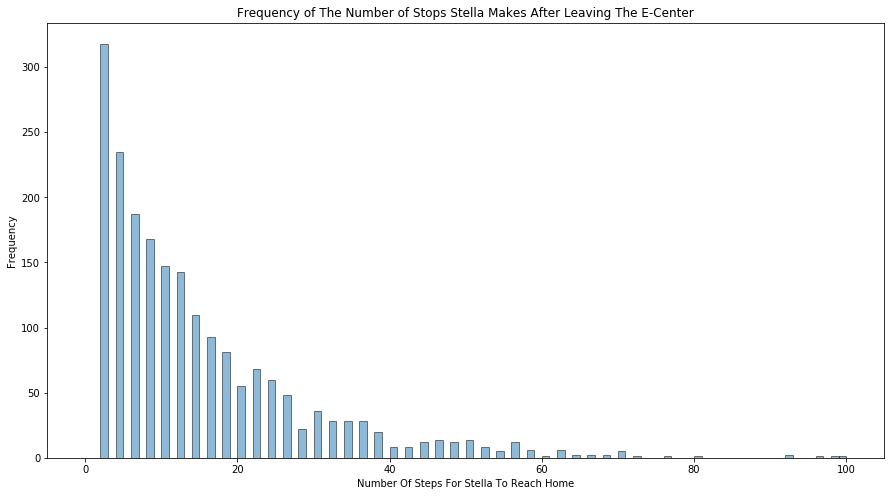

In [6]:
# Solution
#get max of results to avoid cutting off data when making the bins object. 
bins = range(0, np.max(results) + 1, 1)

fig, ax = plt.subplots(1,1, figsize=(15,8))
ax.hist(results, bins = bins, alpha = 0.5, histtype='bar', ec='black')
ax.set_xlabel("Number Of Steps For Stella To Reach Home")
ax.set_ylabel("Frequency")
ax.set_title("Frequency of The Number of Stops Stella Makes After Leaving The E-Center")
plt.show()

**Part G:** Did you find it easier to calculate the probabilities by hand or simulate them with Python? What are some of the pro's and con's of simulating the probabilities versus calculating them by hand. Do you think it would be feasible to calculate the probabilities by hand for a graph that was much larger (eg. 100 Locations and 500 Paths)?

**Solution:** For all but the smallest number of stops, it was easier to simulate the probabilities. A by hand calculation will give you the exact probability, while the simulations may be off by a bit. By hand calculations might be easier for small problems. But for bigger problems,, it is hard to totally infeasible to calculate the probabilities by hand. 

***


### [20 points] Problem 3  

As part of the Computer Science Jedi training, John and Tom will be having a lightsaber duel. The rules of the lightsaber duel are as follows:
* The duel is composed of a number of rounds.
* In each round John tries to strike Tom, then Tom tries to strike John.
* If John manages to strike Tom, then John is awarded a point, and similarly if Tom manages to strike John, then Tom is awarded a point.
* If a round ends in a tie, then John and Tom proceed to another round. If a round ends with one Jedi scoring a point but the other one does not, then the Jedi who scored a point wins the duel.

Let $J$ be the event that "John wins the duel", $F$ be the event that "the duel finishes after the first round of lightsaber strikes", and $G$ be the event that "the duel goes on after the first round of lightsaber strikes".  Suppose that the result of one lightsaber strike is independent of the other strikes. Furthermore, John successfully lands his lightsaber strikes with probability $p$, and Tom lands his strikes with probability $q$.

**Part A**: The duel will continue until John or Tom wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that John has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds followed by "..." to show that you have established a pattern.

**Solution**: 

$$
\Omega = \{HM, MH, HHHM, HHMH, MMHM, MMMH, \ldots \}
$$

**Part B**: Determine $P(J \mid F)$ in terms of $p$ and $q$.

**Solution**:

We have 

$$
P(J \mid F) = \frac{P(J \cap F)}{P(F)} = \frac{P(\{HM\})}{P(\{HM, MH\})} = \frac{p(1-q)}{p(1-q) + (1-p)q} = \frac{p(1-q)}{p + q -2pq}
$$

**Part C**: Explain why events $J$ and $G$ are independent. 

**Solution**:

We have many tests for independence that we could employ, mathematically. In words, however, the probability that John wins and the probability that the duel goes on after the first round *must* be independent. Each round of the duel begins with the two Jedi tied, and takes place identically, regardless of what score John and Tom are tied at. (5 to 5 is the same as 10 to 10). So John's probability of winning beginning on round 1 versus his probability of winning beginning on round 5 (after 4 tied rounds) must be the same. In symbols, that means
$$P(J \mid G) = P(J)$$
which means they are independent.

**Part D**: Use the Law of Total Probability to show that $P(J) = p(1-q) + (2pq - p - q +1) ~P(J \mid G)$. 

**Solution**: 

We'll use the Law of Total Probability and condition on the events that the duel ends and that the duel remains tied after the first round. 

\begin{eqnarray}
\nonumber P(J) &=& P(J \mid F)P(F) + P(J \mid G)P(G)  \\
\\
\nonumber  &=& P(J \mid F)P(\{HM, MH\}) + P(J \mid G)P(\{HH, MM\})  \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} P(\{HM, MH\}) + P(J \mid G)P(\{HH, MM\})  \quad \left[\textrm{From }\textbf{Part A}\right] \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} \left[P(HM)+ P(MH))\right] + P(J \mid G)\left[P(HH) + P(MM)   \right] \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} \left[p(1-q)+ (1-p)q\right] + P(J \mid G)\left[pq + (1-p)(1-q)   \right] \\
\\
\nonumber  &=& \frac{p(1-q)}{p + q -2pq} \left[p + q - 2pq\right] + P(J \mid G)\left(2pq - p - q +1 \right) \\
\\
\nonumber  &=& p(1-q) + P(J \mid G)\left(2pq - p - q +1 \right) \quad \checkmark \\
\end{eqnarray}

**Part E**: Use the independence property from **Part B** that $P(J \mid G) = P(J)$ to determine $P(J)$ in terms of $p$ and $q$. 

**Solution**: 

We'll use the Law of Total Probability and condition on the events that the duel ends and that the duel remains tied after the first round. 

Part D tells us:
$$P(J) = p(1-q) + P(J \mid G)\left(2pq - p - q +1 \right)$$

And Part C (independence of $J$ and $G$) tells us:
$$P(J \mid G) = P(J)$$

Put them together.
$$P(J) = p(1-q) + P(J)\left(2pq - p - q +1 \right)$$

Solve algebraically for $P(J)$.
$$P(J) \left [1- \left(2pq - p - q +1 \right) \right ]= p(1-q)$$

Cancel the 1 and -1, and solve.
$$P(J) = \frac{p(1-q)}{-2pq + p + q }$$

***


### [20 points] Problem 4

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of <a href="https://en.wikipedia.org/wiki/Monopoly_(game)">Monopoly</a>). The game consists of a round board with 40 cells numbered from $0$ to $39$, where cell $0$ and would-be $40$ are coincident and called **GO**. A player starts at **GO** with \$200 in their pocket. On each turn the player rolls a pair of dice and move the number of cells equal to the sum of two dices. Landing on different cells have different results:

- Cells 2，8，13，17，25, and 33 causes you two draw a card. The cards may tell you to collect \\$50 or \\$100, or pay the bank \\$50 or \\$75. There is always an equal probability associated with drawing each of these possible cards.

<p> </p>

- Cell 1, 7, and 10 does not trigger any actions.

<p> </p>

- Cell 20 is **Lottery**. If a player lands on cell 20, then they are awarded a Lottery bonus of \\$500, this should be the input variable to your `miniopoly_turn` function called `bonus`.
<p> </p>

- Cell 30 is **Go To Jail**. If a player lands on cell 30, they would be locked up in jail.

<p> </p>

- If a player starts a turn in **Jail**, they roll a pair of dice:

    - If the player rolls doubles (i.e. the dice have equal values), then the player moves from Cell 10 a number of Cells equal to the sum of the dice.
    
    - If the player rolls anything other than doubles, then she pays the bank \\$25 and remains in **Jail**.
    
<p> </p>

- If a player passes or lands on **GO**, they collect \\$200.

<p> </p>

- If a player lands on other cells not mentioned above, they pay the bank an amount equal to the cell number (e.g. if they land on cell 19, they pay the bank \\$19).

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function `miniopoly_turn` below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves and the amount of the Lottery (Cell 20) bonus, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.

In [11]:
# Solution:

def miniopoly_turn(state, cash, bonus=500):
    # roll two dice
    a = np.random.randint(1, 7)
    b = np.random.randint(1, 7)
    
    if cash <= 0:
        return state,0
    
    if state == 30:
        if a == b:
            state = 10 + a + b
        else:
            cash -= 25
            
        return state,cash
    else:
        state += (a + b)
        
        if state == 20:
            cash += bonus
        elif state >= 40:
            cash += 200
            state -= 40
        elif state in [2,8,13,17,25,33]:
            cash += np.random.choice([50,100,-50,-75])
        elif state not in [1,7,10,2,8,13,17,25,33]:
            cash -= state

        
    return state, cash

In [12]:
state = 0
cash = 200
miniopoly_turn(state,cash)

(7, 200)

**Part B:** Use your function from **Part A** to stimulate at least 5000 games of Miniopoly that consists 20 turns and 40 turns, respectively. Make a **density** histogram of the player's cash amount at the end of the game under the both the 20-turn and 40-turn scenarios. Plot both histograms on the same set of axes, the histogram box faces should be slightly transparent and of different colors, so as to be able to tell the 2 game-length scenarios apart. For both histograms, use bins of width \$250, starting at 0 on the left and extending as far to the right as needed. As always, be sure to label your axes and include an informative legend.

In [13]:
# Solution:
def games_simulation(num_turns, num_trials=5000):
    games_results = []
    for games in range(num_trials):
        
        state, cash = 0, 200
        for a in range (num_turns):
            state, cash=miniopoly_turn(state,cash)
            if cash == 0:
                break
        games_results.append(cash)
    return games_results

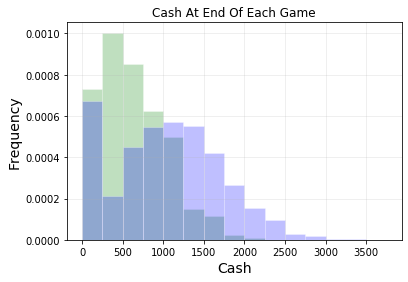

In [14]:
twenty_turns = games_simulation(20)
forty_turns = games_simulation(40)
plt.hist(twenty_turns,facecolor="green", edgecolor="white", Alpha=0.25, bins = np.arange(0, max(twenty_turns), 250),density = True)
plt.hist(forty_turns,facecolor="blue", edgecolor="white", Alpha=0.25, bins = np.arange(0, max(forty_turns), 250),density = True)
plt.xlabel("Cash", fontsize = 14)
plt.ylabel("Frequency",fontsize = 14)
plt.title("Cash At End Of Each Game")
plt.grid(alpha=0.25)

**Part C**: Use your code from **Part A** and **Part B** to estimate the probability that a player goes bankrupt in the 60 turns. Simulate at least 10,000 games.

In [18]:
# Solution:

sixty_turns = np.array(games_simulation(60, 10000))
num_bankrupt = np.sum(sixty_turns == 0)
print("Probability of going bankrupt: " + str(num_bankrupt/10000))

Probability of going bankrupt: 0.1705


**Part D**:  Use your code from **Part A** and **Part B** to estimate the probability that a player goes bankrupt in a 60 turn game  _given_ that they have been to **Jail** at least twice and never won a **Lottery**.  Is a player more or less likely to go bankrupt if they've been to jail twice and never won a **Lottery**? Simulate at least 10,000 games.

NOTE: If a player is already in jail and failed to roll a double, she will remain in Jail, which would increase the number of time she has been to jail by one.

In [16]:
# Solution:

def jail_lottery_game():
    jail_count = 0
    state, cash = 0, 200
    lottery_count = 0
    
    for turn in range(0,60):
        state, cash = miniopoly_turn(state,cash)
        
        if state == 30:
            jail_count += 1
        if state == 20:
            lottery_count += 1
            
        if cash <= 0:
            break
            
    if jail_count >= 2 and lottery_count == 0:
        return cash if cash > 0 else 0
    else:
        return jail_lottery_game()

In [17]:
n = 10000
bankrupt = 0
for i in range(n):
    if jail_lottery_game() == 0:
        bankrupt += 1
        
print("Probability of going bankrupt with Jail at least twice and no Lottery: " + str(bankrupt/n))

Probability of going bankrupt with Jail at least twice and no Lottery: 0.5707


***


### [20 points] Problem 5

Suppose you roll two fair six-sided dice.  Let $C$ be the event that the two rolls are _close_ to one another in value, in the sense that they're either equal or differ by only 1. 

**Part A**:  Compute $P(C)$ by hand. 


**Solution:**

$\begin{align}
P(C) &= P(\text{same}) + P(\text{differ by one})
\end{align}$

We can start with the more straightforward part, $P(\text{same})$.
* There are a total of 36 possible outcomes (not necessarily distinct sums of the dice), and each is equally likely with probability 1/36.
* Six of these 36 outcomes correspond to rolling the same number of both dice (1-1, 2-2, and so on).
* Thus, the probability of rolling the same on both dice is $P(\text{same}) = 6\cdot 1/36 = 6/36$

Now it is time for the slightly tougher part, calculating $P(\text{differ by one})$
* There are five ways for the two dice to come up differing by one: 1-2, 2-3, 3-4, 4-5 and 5-6
* Each of these five ways has two possible "orientations": 1-2 and 2-1, for example
* This gives 10 distinct outcomes of the total 36, where the dice differ by one
* Thus, the probability of rolling two numbers that differ by one is $P(\text{differ by one}) = 10\cdot 1/36 = 10/36$

So we have $\fbox{$P(C) = 6/36 + 10/36 = 16/36 \approx 0.444$}$

**Part B**: **Part B**: Write a simulation to run many trials (at least 10,000) of the pair of rolls and estimate the value of $P(C)$ you calculated in **Part A**.  Does your estimate agree with the exact calculation you did in **Part A**?  If not, try increasing the number of trials in your simulation. 

In [35]:
def get_binary_array_of_whether_roll1_within_1_of_roll2(num_trials=10000):
    roll1 = np.random.choice(np.array([1,2,3,4,5,6]), size=num_trials)
    roll2 = np.random.choice(np.array([1,2,3,4,5,6]), size=num_trials)
    return np.abs(roll1 - roll2) <= 1

np.sum(get_binary_array_of_whether_roll1_within_1_of_roll2()) / 10000

0.4394

**Part C**: In the in-class notebook associated with Lecture 4 (nb04) we plotted a running estimate of the probability of an event as a function of the number of trials in our simulation.  Write code to run at least 10 independent simulations of at least 50,000 trials each to estimate $P(C)$ and plot their running estimate curves on the same set of axes. **Hint**: This is a lot of computation, so try to leverage Numpy as much as possible so that your code doesn't run forever. 

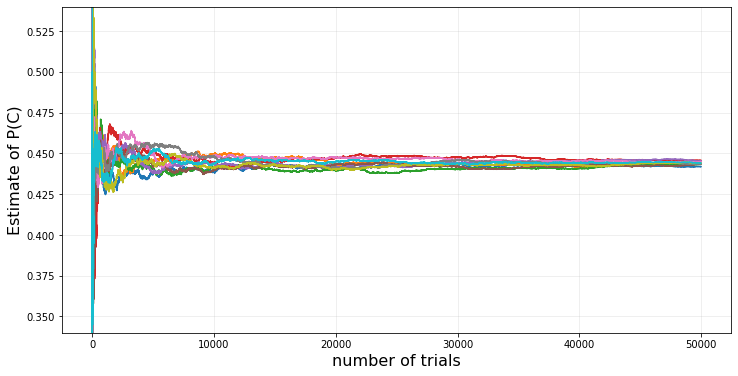

In [37]:
# Solution:

def dice_sim(num_trials=50000):
    
    roll1_within_1_roll2 = get_binary_array_of_whether_roll1_within_1_of_roll2(num_trials)
    
    return np.cumsum(roll1_within_1_roll2) / np.arange(1, num_trials + 1)
    
def plot_estimates(num_sims=10):
    
    fig, ax = plt.subplots(figsize=(12,6))
    for ii in range(num_sims):
        p = dice_sim(50000)
        ax.plot(p)
        
    ax.grid(True, alpha=0.25)
    ax.set_axisbelow(True)
    ax.set_xlabel("number of trials", fontsize=16)
    ax.set_ylabel("Estimate of P(C)", fontsize=16)
    ax.set_ylim([.34,.54])
        
plot_estimates()

**Part D**: Comment on the behavior of the running estimates as the number of trials increases. 

**Solution:**

The different estimates take about 10,000 iterations to start to converge on 44%. But as the number of trials increases, the ten estimates start to blend together, although we can see that even by 50,000 trials, the ten estimates are not yet indistinguishable from one another.